In [1]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import io

# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [2]:
tennis = pd.read_csv("data/tennis.csv")

In [3]:
# got help from Javad

x = tennis["player1 total points total"]
y = tennis["player2 total points total"]

x = x.dropna()
y = y.dropna()

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     player2 total points total   R-squared:                       1.000
Model:                                    OLS   Adj. R-squared:                  1.000
Method:                         Least Squares   F-statistic:                 4.040e+33
Date:                        Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                                19:44:53   Log-Likelihood:                 30577.
No. Observations:                        1027   AIC:                        -6.115e+04
Df Residuals:                            1025   BIC:                        -6.114e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.066e-14   2.68e-15      3.977      0.000     5.4e-15    1.59e-14
player1 total points total     1.0000   1.57e-17   6.36e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      317.192   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1163.034
Skew:                           1.455   Prob(JB):                    2.82e-253
Kurtosis:                       7.326   Cond. No.                         514.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A regression model should always include a constant, because it adds an extra dimention to the model, making it fit better and display more accurately. Though I think I may have made my fit model above completely wrong... having run it once without a constant and once with a constant, the results had improved with the addition of a constant. The "std" shrunk and so did the "t". The "P>|t|" stayed at 0 however.

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


In [4]:
college = pd.read_csv("data/college.csv")

In [35]:
# college.head()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2220.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          2.50e-321
Time:                        19:56:33   Log-Likelihood:                -2681.0
No. Observations:                 777   AIC:                             5368.
Df Residuals:                     774   BIC:                             5382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6786      0.845     19.738      0.000      15.020      18.337
Top10perc      1.8140      0.050     36.229      0.000       1.716       1.912
Top102        -0.0102      0.001    -17.072      0.000      -0.011      -0.009
==============================================================================
Omnibus:                      177.730   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.823
Skew:                           1.089   Prob(JB):                    1.12e-124
Kurtosis:                       6.590   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

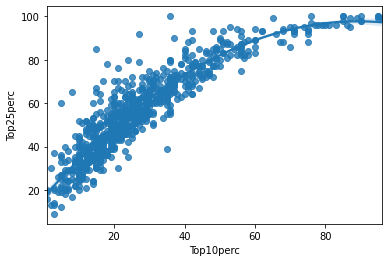

In [31]:
# Question 2.1: Received help from Matthieu

x = college["Top10perc"]
y = college["Top25perc"]

x = sm.add_constant(x)
x["Top102"] = x["Top10perc"] ** 2

est = sm.OLS(y, x).fit()
display(est.summary())

sns.regplot(data = college, x = "Top10perc", y = "Top25perc", order=2);

# There is a relation between Top10perc and Top25perc as shown by the results of the estimator and the P being *very* significant
# The model works much better with a polynomial feature, improving the R-squared, Log-Likelyhood, AIC and BIC

In [163]:
# 2.2: Received help from Matthieu
x = pd.get_dummies(college["Private"], drop_first = True)
y = college["Accept"]

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()
est.summary()

# Here we can see that private schools in fact see much less admissions overall compared to public schools as demonstrated by 
# the very large and negatively skewed coefficient.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Accept   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     226.1
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           4.95e-45
Time:                        20:53:58   Log-Likelihood:                -7066.5
No. Observations:                 777   AIC:                         1.414e+04
Df Residuals:                     775   BIC:                         1.415e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3919.2877    148.212     26.444      0.000    3628.343    4210.233
Yes        -2613.5851    173.808    -15.037      0.000   -2954.776   -2272.394
==============================================================================
Omnibus:                      603.909   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15927.055
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      24.195   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [101]:
with open('data/auto.csv', 'r') as f:
    lines = f.readlines()

data = io.StringIO("".join([row for row in lines]))
auto = pd.read_csv(data, delim_whitespace = True)
auto = auto[1:].reset_index(drop = True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [103]:
# found 5 "?" in horsepower... time to remove them
for i in range(len(auto.horsepower)):
    if auto.horsepower[i] == "?":
        auto.horsepower[i] = 0

# converting all relavant columns to ints (for numbers 3 and 4)
for column in auto.columns:
    if column != "name":
        auto[column] = auto[column].astype(float).astype(int)

In [104]:
# 3.1:
x = auto["horsepower"]
y = auto["mpg"]

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()
est.summary()

# According to the P value, there is a relationship between the predictor (horsepower) andd the response (mpg)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     545.3
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           2.11e-76
Time:                        20:33:49   Log-Likelihood:                -1204.2
No. Observations:                 397   AIC:                             2412.
Df Residuals:                     395   BIC:                             2420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5995      0.700     55.123      0.000      37.223      39.976
horsepower    -0.1478      0.006    -23.352      0.000      -0.160      -0.135
==============================================================================
Omnibus:                       12.269   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.310
Skew:                           0.327   Prob(JB):                     0.000781
Kurtosis:                       3.662   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.2:
#### The relationship doesn't seem very strong, it is mildly strong at best.

#### 3.3:
#### The relationship is negative.

#### 3.4 
#### y = -0.1478 * 98 + 0.006 = -14.478399999999999

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

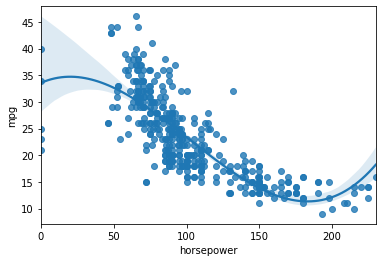

In [105]:
# 3.5: 
sns.regplot(data=auto, x="horsepower", y="mpg", order=3)

# adding a polynomial order of 2 makes the curve fit the data better
# adding a polynomial order of 3 makes the curve fit MUCH better, though not perfect. This is expected with the R-squared

# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [106]:
# 4.1:
x = auto.drop(columns=["name", "mpg"])
y = auto["mpg"]

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()
est.summary()

# There is a relationship some of the predictors and the response

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.9
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          5.65e-140
Time:                        20:34:16   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.4829      4.490     -3.448      0.001     -24.311      -6.655
cylinders       -0.4962      0.322     -1.540      0.124      -1.130       0.137
displacement     0.0202      0.007      2.728      0.007       0.006       0.035
horsepower      -0.0147      0.011     -1.309      0.191      -0.037       0.007
weight          -0.0066      0.001    -10.624      0.000      -0.008      -0.005
acceleration     0.0953      0.090      1.062      0.289      -0.081       0.272
year             0.7238      0.050     14.360      0.000       0.625       0.823
origin           1.4455      0.278      5.209      0.000       0.900       1.991
==============================================================================
Omnibus:                       29.010   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.498
Skew:                           0.503   Prob(JB):                     1.32e-10
Kurtosis:                       4.318   Cond. No.                     8.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 4.2:
#### Displacement, weight, year, and origin all have a statistically significant relationship to the response

#### 4.3:
#### The coefficient suggests that for every year that passes, the mpg of a car can be expected to improve by 0.7238

#### 4.4:
#### The year feature, by comparison to everything else, seems to be an outlier. The origin feature is much higher than the other 
#### features in the matrix, and could be considered an unusually large outlier.

#### 4.5:
#### After running each column in a plot below, I do not believe there is heteroscedasticity in the fit

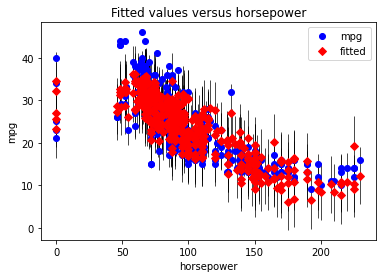

In [135]:
# one plot for every column, each column has a different relationship/plot
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(est, 3, ax=ax)

# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [178]:
car = pd.read_csv("data/carseats.csv")
car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [185]:
car["dummy_Urban"] = pd.get_dummies(car["Urban"], drop_first=True)
car["dummy_US"] = pd.get_dummies(car["US"], drop_first=True)

In [182]:
# 5.1:
x = car[["Price", "dummy_Urban", "dummy_US"]]
y = car["Sales"]

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           2.39e-23
Time:                        20:57:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0435      0.651     20.036      0.000      11.764      14.323
Price          -0.0545      0.005    -10.389      0.000      -0.065      -0.044
dummy_Urban    -0.0219      0.272     -0.081      0.936      -0.556       0.512
dummy_US        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5.2:
#### Price: For every change in X we can expect a change in sales by -0.0545
#### dummy_Urban: No was dropped, the coefficient shows that in urban areas, we can expect -0.0219 less sales than in rural areas
#### dummy_US: No was dropped, the coefficient shows that sales are 1.2006 times higher in the US than elsewhere

#### 5.3:
#### We reject the null hypothesis for dummy_Urban, because it's P value is 0.936

In [186]:
# 5.4: 
x = car[["Price", "dummy_US"]]
y = car["Sales"]

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           2.66e-24
Time:                        21:02:03   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
dummy_US       1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5.5: 
#### The models look mostly identical. The R-squared hasn't changed at all, the Log-Likelyhood has gotten worse, but the
#### AIC and BIC have improved marginally. The differences are very small

In [192]:
# 5.6: received help from Jasleen
# We can see from the model that the confidence interval of Price is within -0.065 and -0.044
# and that the confidence interval for dummy_US is within 0.692 and 1.708.

# This information is under [0.025 0.975] in the results

In [191]:
est.conf_int(0.05)

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
dummy_US,0.69152,1.707766
